Hello World.
<class 'sklearn.utils.Bunch'>
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      gl

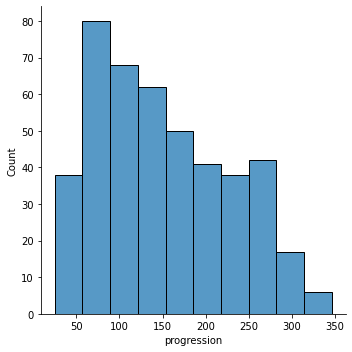

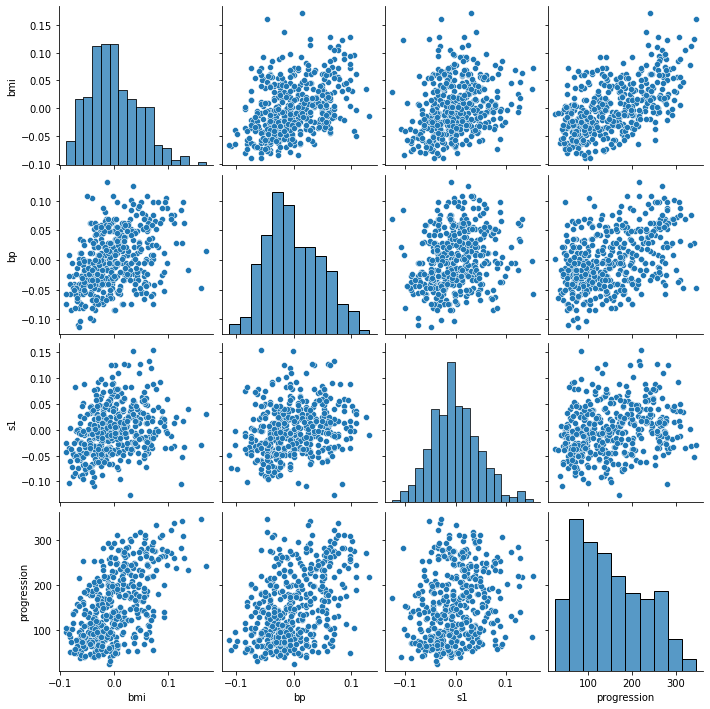

In [13]:
print("Hello World.")

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression#It is the machine learning algorithm.
from sklearn.model_selection import train_test_split#To split the data into train and test data.
from sklearn.metrics import mean_squared_error
import seaborn as sbn

diabetes = load_diabetes()#Loading the dataset.
print(type(diabetes))
print(diabetes.DESCR)

print("------------------------------------------------------------------------------------.")
print("------------------------------------------------------------------------------------.")


df = pd.DataFrame(diabetes.data)#Creating a pandas dataframe.


df.columns = diabetes.feature_names#Show the names of columns.
df["progression"] = diabetes.target
print(df.head(10))#To show the first 10 lines of dataframe.
print(df.describe())
#df.describe() shows statistical informations about the dataframe.
#These data include mean, std(standard deviation), max, min, and count(the non-empty values in each row).




print("Missing values:", df.isnull().sum())#Missing values.

print("------------------------------------------------------------------------------------.")
print("------------------------------------------------------------------------------------.")

print(df.info())
print(df.items())

sbn.displot(df['progression'])#Analyze the progression of diabetes.

sbn.pairplot(df[['bmi','bp','s1','progression']])#The analyzis between body mass, blood pressure, total serum cholesterol and diabetes progression.

#https://towardsdatascience.com/predicting-diabetes-with-machine-learning-part-i-f151cb764aee
#https://ai.plainenglish.io/how-to-make-predictions-with-sklearns-diabetes-dataset-eeacce231898


X = df.drop(['progression'],axis=1)#Drop the 'progression' column. It's not the dependent variable.
y = df.progression

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
#The machine learning algorithm needs to train and test data. Then, they are separated in tran and test.

print(X_train,X_test,y_train,y_test)
l = LinearRegression()#Linear Regression algorithm.
l.fit(X_train,y_train)
p = l.predict(X)
print("Predict:",p)



mse = mean_squared_error(y,p,squared=True)
print("mean_squared_error:",mse)




#Mean squared error measures the amount of errors in statistical works.
#It uses the average squared difference between observed and predicted data.
#If it is 0, the mse is zero. If model error increases, the mse also increases.
#mse is also known as mean squared deviation(msd).


